### Suba semanalmente sus avances a git
Simule el primer sistema cuántico descrito en la sección 4.1.

El sistema consiste en una partícula confinada a un conjunto discreto de posiciones en una línea. El simulador debe permitir especificar el número de posiciones y un vector ket de estado asignando las amplitudes.

1. El sistema debe calcular la probabilidad de encontrarlo en una posición en particular.

In [12]:
import numpy as np

def probabiidad(vector,pos):
    return np.abs(vector[pos])**2 / np.linalg.norm(vector)**2

vector = [-3-1j,-2j,1j,2]
print(probabiidad(vector,2))

0.05263157894736841


### 
2. El sistema si se le da otro vector Ket debe buscar la probabilidad de transitar del primer vector al segundo.

In [20]:
import numpy as np
import math

def probabilidad_transitar(vector2,vector1):
    vector2 = np.array(vector2)
    adjunta = vector2.T.conj()
    probabi = np.abs(np.vdot(adjunta, vector1))**2
    return probabi

vector2 = [0.3+0.4j,0.7+0.6j]
vector1 = [0.6+0.8j,0.1+0.2j]
print(probabilidad_transitar(vector2,vector1))

0.4985


### Complete los retos de programación del capítulo 4.
1. Amplitud de transición. El sistema puede recibir dos vectores y calcular la probabilidad de transitar de el uno al otro después de hacer la observación

In [25]:
import numpy as np

def probabilidad_transitar(vector2, vector1):
    vector2 = np.array(vector2)
    vector1 = np.array(vector1)
    probabilidad = np.abs(np.vdot(vector2, vector1))**2
    return probabilidad

vector2 = [-3 - 1j, -2j, 1j, 2]
vector1 = [1 - 2j, -3j, 4, -5 + 2j]
print(probabilidad_transitar(vector2, vector1))


74.0


### 
2. Ahora con una matriz que describa un observable y un vector ket, el sistema revisa que la matriz sea hermitiana, y si lo es, calcula la media y la varianza del observable en el estado dado.

In [33]:
import numpy as np

def es_hermitiana(matriz):
    return np.allclose(matriz, matriz.conj().T)

def calcular_observable(matriz, vector_estado, observable):
    matriz_hermitiana = np.array(matriz)

    if es_hermitiana(matriz_hermitiana):
        valor_esperado = media(vector_estado, observable)
        return es_hermitiana(matriz_hermitiana), matriz_hermitiana, valor_esperado, calcular_varianza(observable, vector_estado)
    else:
        return es_hermitiana(matriz_hermitiana), matriz_hermitiana

def calcular_varianza(observable, vector_estado):
    observable_cuadrado = np.dot(observable, observable)
    valor_es1 = np.vdot(vector_estado, np.dot(observable, vector_estado))
    valor_es2 = np.vdot(vector_estado, np.dot(observable_cuadrado, vector_estado))
    return valor_es2 - valor_es1**2

def media(vector, observable):
    multiplicacion = np.dot(observable, vector)
    return np.vdot(vector, multiplicacion)

matriz = np.array([[2, 1 + 1j, 0],
                   [1 - 1j, 3, 1],
                   [0, 1, 4]])

vector_estado = np.array([1 / np.sqrt(2) + 0j, 0, 1 / np.sqrt(2) + 0j]) 
observable = np.array([[1, 0, 0],
                       [0, 2, 0],
                       [0, 0, 3]])

resultado_observable = calcular_observable(matriz, vector_estado, observable)
varianza_resultado = calcular_varianza(observable, vector_estado)
resultado_media = media(vector_estado, observable)

print(resultado_observable)
print(varianza_resultado)
print(resultado_media)


(True, array([[2.+0.j, 1.+1.j, 0.+0.j],
       [1.-1.j, 3.+0.j, 1.+0.j],
       [0.+0.j, 1.+0.j, 4.+0.j]]), np.complex128(1.9999999999999996+0j), np.complex128(1.0000000000000009+0j))
(1.0000000000000009+0j)
(1.9999999999999996+0j)


### 
3. El sistema calcula los valores propios del observable y la probabilidad de que el sistema transite a alguno de los vectores propios después de la observación.

In [36]:
import numpy as np

def es_hermitiana(matriz):
    return np.allclose(matriz, matriz.conj().T)

def calcular_observable(matriz, estado, observable):
    matriz_hermitiana = np.array(matriz)

    if es_hermitiana(matriz_hermitiana):
        valor_esperado = np.vdot(estado, np.dot(observable, estado))
        return es_hermitiana(matriz_hermitiana), matriz_hermitiana, valor_esperado, calcular_varianza(observable, estado)
    else:
        return es_hermitiana(matriz_hermitiana), matriz_hermitiana

def calcular_varianza(observable, estado):
    O2 = np.dot(observable, observable)
    valor_es1 = np.vdot(estado, np.dot(observable, estado))
    valor_es2 = np.vdot(estado, np.dot(O2, estado))
    return valor_es2 - valor_es1**2

def calcular_valores_propios(observable):
    valores_propios, vectores_propios = np.linalg.eigh(observable)
    return valores_propios, vectores_propios

def probabilidades_transicion(estado, vectores_propios):
    probabilidades = []
    for v_i in vectores_propios.T: 
        probabilidad = np.abs(np.vdot(v_i, estado))**2
        probabilidades.append(probabilidad)
    return probabilidades

matriz_nueva = np.array([[3, 2 + 1j, 1],
                         [2 - 1j, 4, 0],
                         [1, 0, 5]])

vector_nuevo = np.array([2 + 0j, 1 - 1j, 0.5 + 0j])

observable_nueva = np.array([[0, 1, 0],
                             [1, 0, 1],
                             [0, 1, 0]])

resultado = calcular_observable(matriz_nueva, vector_nuevo, observable_nueva)
es_hermitiana_resultado, matriz_hermitiana_resultado, valor_esperado_resultado, varianza_resultado = resultado
print(es_hermitiana_resultado, matriz_hermitiana_resultado, valor_esperado_resultado, varianza_resultado)



True [[3.+0.j 2.+1.j 1.+0.j]
 [2.-1.j 4.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 5.+0.j]] (5+0j) (-14.75+0j)


###
4. Se considera la dinámica del sistema. Ahora con una serie de matrices Un el sistema calcula el estado final a partir de un estado inicial.

In [43]:
import numpy as np

def es_hermitiana(matriz):
    return np.allclose(matriz, matriz.conj().T)

def calcular_estado_final(estado_inicial, matrices):
    estado_final = estado_inicial.astype(np.complex128)
    for matriz in matrices:
        estado_final = np.dot(matriz, estado_final)
        estado_final /= np.linalg.norm(estado_final)
    return estado_final
matrices_dinamica = [
    np.array([[0, 1], [1, 0]], dtype=np.complex128), 
    np.array([[1, 0], [0, np.exp(1j * np.pi / 4)]], dtype=np.complex128), 
    np.array([[np.cos(np.pi / 4), -np.sin(np.pi / 4)],  
              [np.sin(np.pi / 4), np.cos(np.pi / 4)]], dtype=np.complex128)
]
estado_inicial = np.array([1, 0], dtype=np.complex128)

estado_final = calcular_estado_final(estado_inicial, matrices_dinamica)
print(estado_final)

[-0.5-0.5j  0.5+0.5j]


### Realice los siguientes problemas e incluyalos como ejemplos
Modele en su librería los problemas
4.3.1

In [6]:
import numpy as np

def calcular_probabilidades(estado_inicial):
    Sx = np.array([[0, 1], [1, 0]])
    estado_resultante = np.dot(Sx, estado_inicial)

    prob_spin_up = abs(estado_resultante[0])**2
    prob_spin_down = abs(estado_resultante[1])**2

    return prob_spin_up, prob_spin_down

estado_inicial = np.array([1, 0])
prob = calcular_probabilidades(estado_inicial)

print("Probabilidad de transición en spin up:", prob[0])
print("Probabilidad de transición en spin down:", prob[1])



Probabilidad de transición en spin up: 0
Probabilidad de transición en spin down: 1


###
4.3.2

Probabilidad de transición en spin up: 0
Probabilidad de transición en spin down: 1


Text(0.5, 1.0, 'gráfica probabilidad de valores propios')

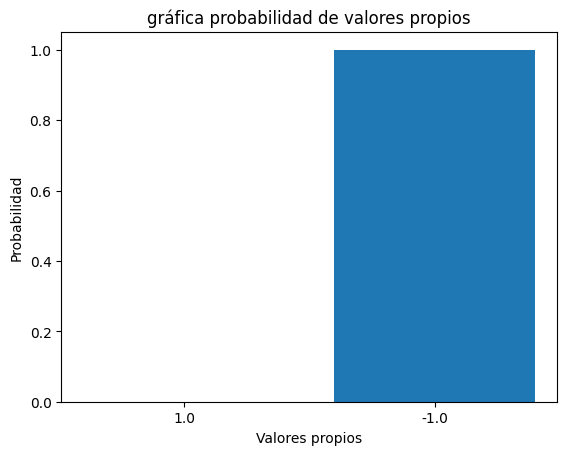

In [10]:
import numpy as np
import matplotlib.pyplot as plt

est_in = np.array([1, 0])

Spiny= np.array([[0, 1], [1, 0]])

result = np.dot(Spiny, est_in)

prob_spin_arriba = abs(result[0])**2
prob_spin_abajo = abs(result[1])**2

print("Probabilidad de transición en spin up:", prob_spin_arriba)
print("Probabilidad de transición en spin down:", prob_spin_abajo)

valores_propios, _ = np.linalg.eig(Spiny)
plt.bar(np.arange(len(valores_propios)), abs(result)**2)
plt.xticks(np.arange(len(valores_propios)), valores_propios)
plt.xlabel('Valores propios')
plt.ylabel('Probabilidad')
plt.title('gráfica probabilidad de valores propios')


###
4.4.1

In [12]:
import numpy as np

def verificar_unitarias_y_producto():
    matriz1 = np.array([[0, 1], [1, 0]])
    matriz2 = np.array([[np.sqrt(2)/2, np.sqrt(2)/2], [np.sqrt(2)/2, -np.sqrt(2)/2]])

    unidad1 = "es" if np.allclose(np.dot(matriz1.conj().T, matriz1), np.eye(2)) else "no es"
    unidad2 = "es" if np.allclose(np.dot(matriz2.conj().T, matriz2), np.eye(2)) else "no es"

    productom= np.dot(matriz1, matriz2)
    productou= "es" if np.allclose(np.dot(productom.conj().T, productom), np.eye(2)) else "no es"

    print("U1", unidad1, "unitaria")
    print("U2", unidad2, "unitaria")
    print("El producto de U1 y U2", productou, "unitario")

verificar_unitarias_y_producto()


U1 es unitaria
U2 es unitaria
El producto de U1 y U2 es unitario


###
4.4.2

In [22]:
import numpy as np

def simular_mapa_cuantico():
    mapa_cuan = np.array([
        [0, 1/np.sqrt(2), 1/np.sqrt(2), 0],
        [1j/np.sqrt(2), 0, 0, 1/np.sqrt(2)],
        [1/np.sqrt(2), 0, 0, 1j/np.sqrt(2)],
        [0, 1/np.sqrt(2), -1/np.sqrt(2), 0]
    ])

    estado_inicial = np.array([1, 0, 0, 0])

    estado_final = np.linalg.matrix_power(mapa_cuan, 3) @ estado_inicial

    probabilidad = np.abs(estado_final[2])**2

    print("El estado despues de 3 tiempos es ", estado_final)
    print("La probabilidad de encontrar el punto en el tiempo 3 es ", probabilidad)

simular_mapa_cuantico()


El estado despues de 3 tiempos es  [ 0.        +0.j         -0.70710678+0.70710678j  0.        +0.j
  0.        +0.j        ]
La probabilidad de encontrar el punto en el tiempo 3 es  0.0


###
Desarrolle e incluya en el Github una discusión de los ejercicios 4.5.2 y 4.5.3

###
4.5.2 
∣Ψ⟩=∣ψ1⟩⊗∣ψ2⟩⊗…⊗∣ψ n⟩

4.5.3 ∣α⟩⊗∣β⟩=ac∣x0⟩⊗∣y 0⟩+ad∣x0⟩⊗∣y 1⟩+bc∣x 1⟩⊗∣y 0⟩+bd∣x 1⟩⊗∣y 1⟩